# Import library

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Load dataset for ploting

In [2]:
label_map = {1:'High', 0:'Low'}

dataset = pd.read_csv('../dataset/cleaned/review_priority_prediction/processed_data.csv')

dataset = dataset.rename(columns={'is_high_priority':'Priority-level'})

dataset['Priority-level'] = dataset['Priority-level'].apply(lambda x: label_map[x])

# Explore data

## Let's see values of categorical features

In particular, I am going to explore the following columns: ``NAME_CASH_LOAN_PURPOSE``, `NAME_TYPE_SUITE`, `NAME_CLIENT_TYPE`, `NAME_GOODS_CATEGORY`, `NAME_PORTFOLIO` `NAME_SELLER_INDUSTRY` `NAME_YIELD_GROUP`, `PRODUCT_COMBINATION`,

In [3]:
cat_cols = [
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_TYPE_SUITE',
    'NAME_CLIENT_TYPE', 
    'NAME_GOODS_CATEGORY', 
    'NAME_PORTFOLIO',
    'NAME_SELLER_INDUSTRY', 
    'NAME_YIELD_GROUP', 
    'PRODUCT_COMBINATION'
]

for c in cat_cols:
    print('{}\t:'.format(c), list(dataset[c].unique()))

NAME_CASH_LOAN_PURPOSE	: ['XNA', 'XAP', 'Furniture', 'Payments on other loans', 'Buying a used car', 'Everyday expenses', 'Repairs', 'Purchase of electronic equipment', 'Other', 'Urgent needs', 'Medicine', 'Buying a new car', 'Journey', 'Car repairs', 'Business development', 'Building a house or an annex', 'Gasification / water supply', 'Buying a holiday home / land', 'Wedding / gift / holiday', 'Buying a home', 'Hobby', 'Education', 'Buying a garage', 'Money for a third person', 'Refusal to name the goal']
NAME_TYPE_SUITE	: ['Children', 'Unaccompanied', 'Family', 'XNA', 'Spouse, partner', 'Other_A', 'Other_B', 'Group of people']
NAME_CLIENT_TYPE	: ['Repeater', 'New', 'Refreshed', 'XNA']
NAME_GOODS_CATEGORY	: ['XNA', 'Computers', 'Mobile', 'Medicine', 'Jewelry', 'Gardening', 'Consumer Electronics', 'Photo / Cinema Equipment', 'Construction Materials', 'Auto Accessories', 'Vehicles', 'Furniture', 'Audio/Video', 'Sport and Leisure', 'Clothing and Accessories', 'Office Appliances', 'Homew

## Let's see values of numerical features

In particular, I am going to explore the following columns: `AMT_ANNUITY`, `AMT_APPLICATION`,`AMT_CREDIT`, `AMT_DOWN_PAYMENT`, `AMT_GOODS_PRICE`

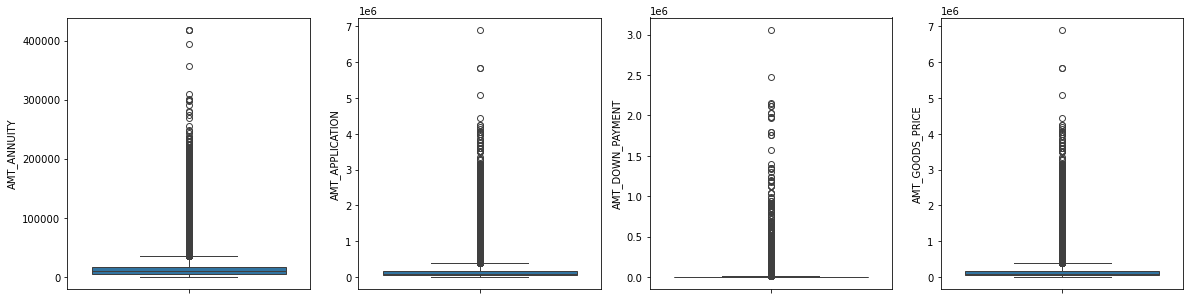

In [4]:
num_cols = [
    'AMT_ANNUITY',
    'AMT_APPLICATION',
    'AMT_DOWN_PAYMENT',
    'AMT_GOODS_PRICE',
]

fig, axes = plt.subplots(1, 4, figsize=(20,5))

for i, c in enumerate(num_cols):
    sns.boxplot(ax = axes[i], data=dataset, y=c)

## Let's see the dataset statistics

In [5]:
def cal_percent(a,b):
    return round(a*100/b,2)

total_data = len(dataset)
total_high_priority = len(dataset[dataset['Priority-level']=='High'])
total_low_priority = total_data - total_high_priority

print('total loan application:', total_data)
print('total high-priority loan application: {} ({}%)'.format(total_high_priority, cal_percent(total_high_priority, total_data)))
print('total low-priority loan application: {} ({}%)'.format(total_low_priority, cal_percent(total_low_priority, total_data)))

total loan application: 970788
total high-priority loan application: 940203 (96.85%)
total low-priority loan application: 30585 (3.15%)


## Relationship between continuous variables and priority level of loan application

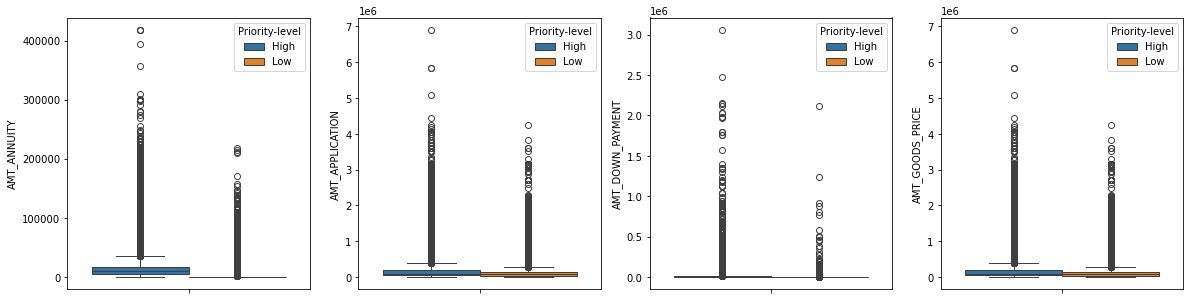

In [6]:
## for full dataset

fig, axes = plt.subplots(1, 4, figsize=(20,5))

for i, c in enumerate(num_cols):
    sns.boxplot(ax = axes[i], data=dataset, y=c, hue='Priority-level')

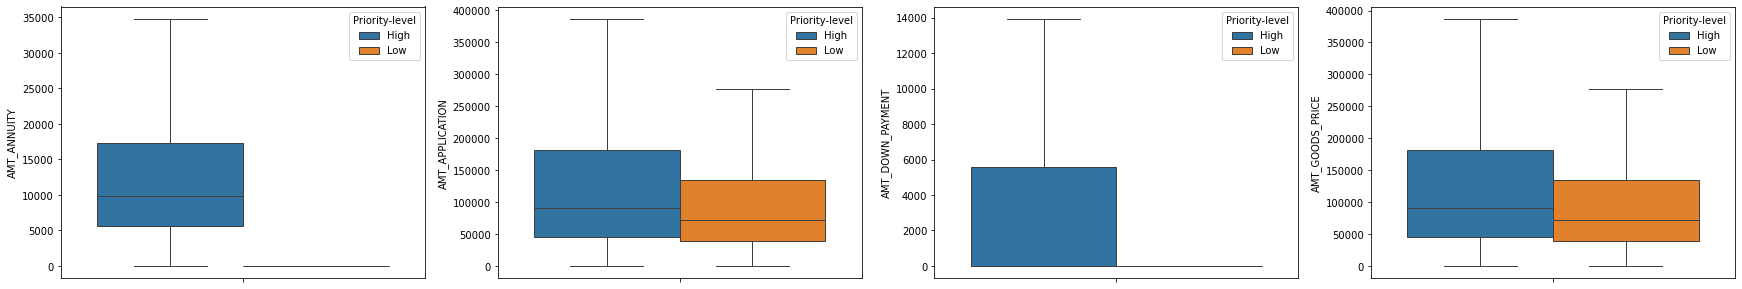

In [7]:
## for dataset without outlier

fig, axes = plt.subplots(1, 4, figsize=(30,5))

for i, c in enumerate(num_cols):
    sns.boxplot(ax = axes[i], data=dataset, y=c, hue='Priority-level', showfliers=False)

## Relationship between categorical variables and priority level of loan application

In [8]:
def get_cat_var_stat_for_bar_plot(cat_col):
    stat_df = dataset.groupby([cat_col,'Priority-level']).size().reset_index()
    stat_df = stat_df.rename(columns={0:'count'})
    stat_df['percent'] = stat_df['count']*100 / stat_df.groupby(cat_col)['count'].transform('sum')
    stat_df['percent'] = stat_df['percent'].round(2)

    return stat_df

In [9]:
stat_df_list = []

for cat in cat_cols:
    stat_df = get_cat_var_stat_for_bar_plot(cat)
    stat_df_list.append(stat_df)

<Axes: xlabel='percent', ylabel='NAME_CASH_LOAN_PURPOSE'>

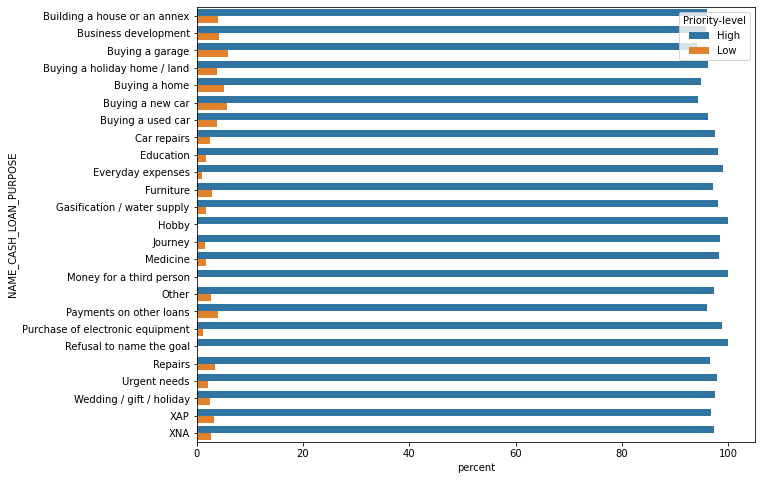

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(data=stat_df_list[0], x='percent', y=cat_cols[0], hue='Priority-level', orient="y")

<Axes: xlabel='percent', ylabel='NAME_TYPE_SUITE'>

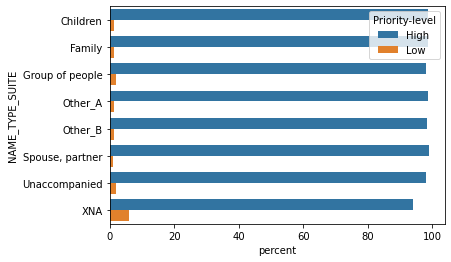

In [11]:
sns.barplot(data=stat_df_list[1], x='percent', y=cat_cols[1], hue='Priority-level', orient="y")

<Axes: xlabel='percent', ylabel='NAME_CLIENT_TYPE'>

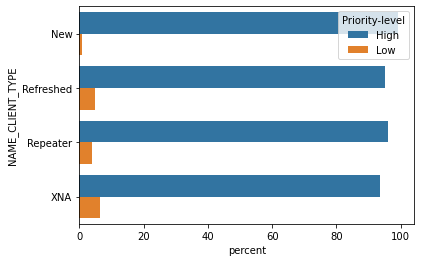

In [12]:
sns.barplot(data=stat_df_list[2], x='percent', y=cat_cols[2], hue='Priority-level', orient="y")

<Axes: xlabel='percent', ylabel='NAME_GOODS_CATEGORY'>

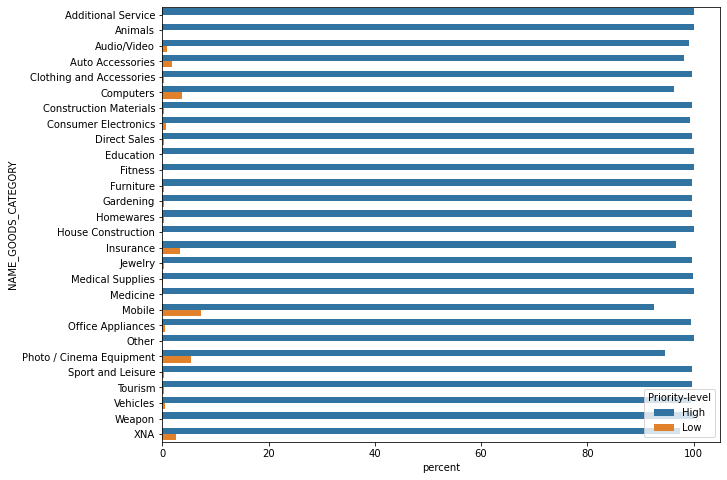

In [13]:
plt.figure(figsize=(10, 8))
sns.barplot(data=stat_df_list[3], x='percent', y=cat_cols[3], hue='Priority-level', orient="y")

<Axes: xlabel='percent', ylabel='NAME_PORTFOLIO'>

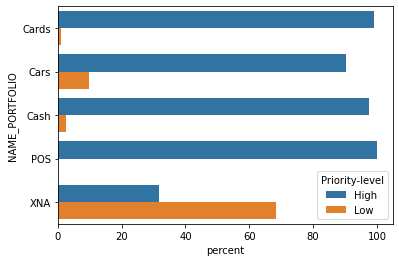

In [14]:
sns.barplot(data=stat_df_list[4], x='percent', y=cat_cols[4], hue='Priority-level', orient="y")

<Axes: xlabel='percent', ylabel='NAME_SELLER_INDUSTRY'>

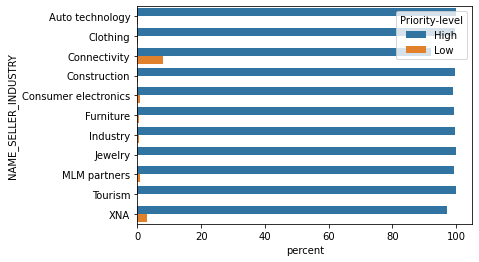

In [15]:
sns.barplot(data=stat_df_list[5], x='percent', y=cat_cols[5], hue='Priority-level', orient="y")

<Axes: xlabel='percent', ylabel='NAME_YIELD_GROUP'>

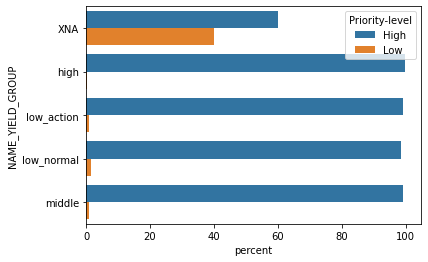

In [16]:
sns.barplot(data=stat_df_list[6], x='percent', y=cat_cols[6], hue='Priority-level', orient="y")

<Axes: xlabel='percent', ylabel='PRODUCT_COMBINATION'>

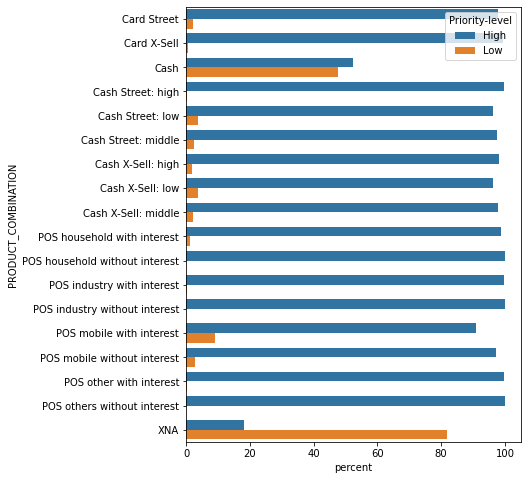

In [17]:
plt.figure(figsize=(6, 8))
sns.barplot(data=stat_df_list[7], x='percent', y=cat_cols[7], hue='Priority-level', orient="y")

## Deeper analysis

In [18]:
melt_df = pd.melt(
    frame=dataset,
    id_vars=['NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO','NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'Priority-level'], 
    value_vars=['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',]
)

In [20]:
melt_df.head()

,NAME_CASH_LOAN_PURPOSE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_YIELD_GROUP,PRODUCT_COMBINATION,Priority-level,variable,value
0,XNA,Repeater,XNA,Cash,high,Cash Street: high,High,AMT_ANNUITY,7425.000
1,XAP,New,Computers,POS,middle,POS mobile with interest,High,AMT_ANNUITY,7740.720
2,XAP,Refreshed,Mobile,POS,high,POS mobile with interest,High,AMT_ANNUITY,8911.350
3,XAP,Repeater,Mobile,POS,high,POS mobile with interest,High,AMT_ANNUITY,3297.195
4,XAP,Repeater,Mobile,XNA,XNA,POS mobile with interest,High,AMT_ANNUITY,0.000


### Relationship between numerical variables and priority level of loan application, categorized by ``NAME_CASH_LOAN_PURPOSE``

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

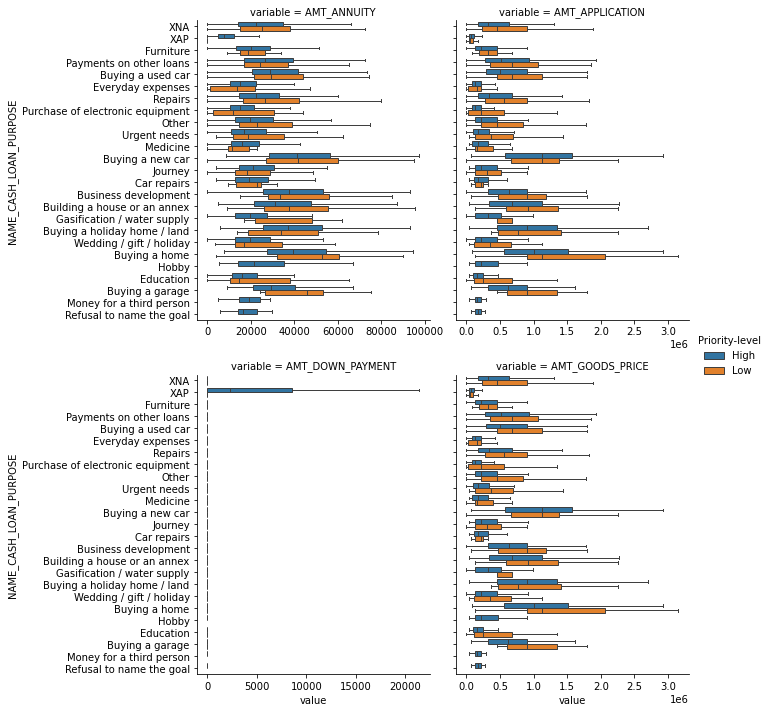

In [21]:
plt.figure(figsize=(10, 10))

sns.catplot(
    data=melt_df, y='NAME_CASH_LOAN_PURPOSE', x='value', hue='Priority-level',
    col='variable', kind='box', col_wrap=2, sharex=False, showfliers=False, orient='y'
)

### Relationship between numerical variables and priority level of loan application, categorized by `NAME_CLIENT_TYPE`

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 576x288 with 0 Axes>

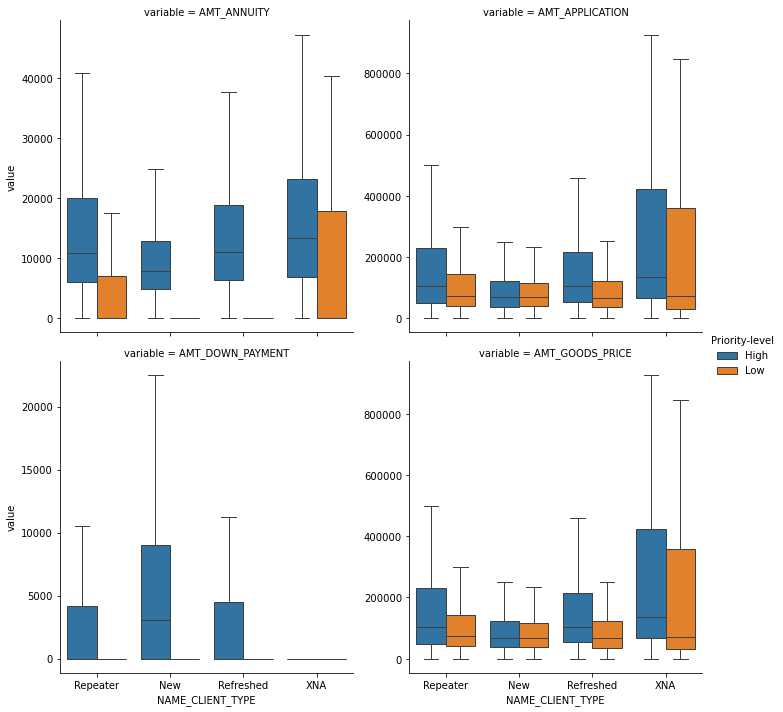

In [22]:
plt.figure(figsize=(8, 4))

sns.catplot(
    data=melt_df, x='NAME_CLIENT_TYPE', y='value', hue='Priority-level',
    col='variable', kind='box', col_wrap=2, sharey=False, showfliers=False
)

### Relationship between numerical variables and priority level of loan application, categorized by `NAME_GOODS_CATEGORY`

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

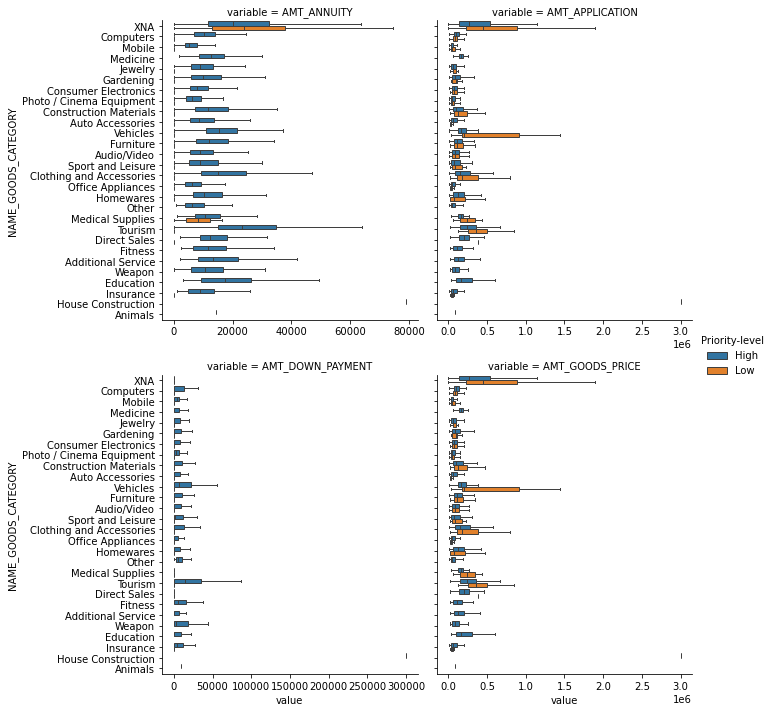

In [23]:
plt.figure(figsize=(10, 10))

sns.catplot(
    data=melt_df, y='NAME_GOODS_CATEGORY', x='value', hue='Priority-level',
    col='variable', kind='box', col_wrap=2, sharex=False, showfliers=False, orient='y'
)

### Relationship between numerical variables and priority level of loan application, categorized by `NAME_PORTFOLIO`

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


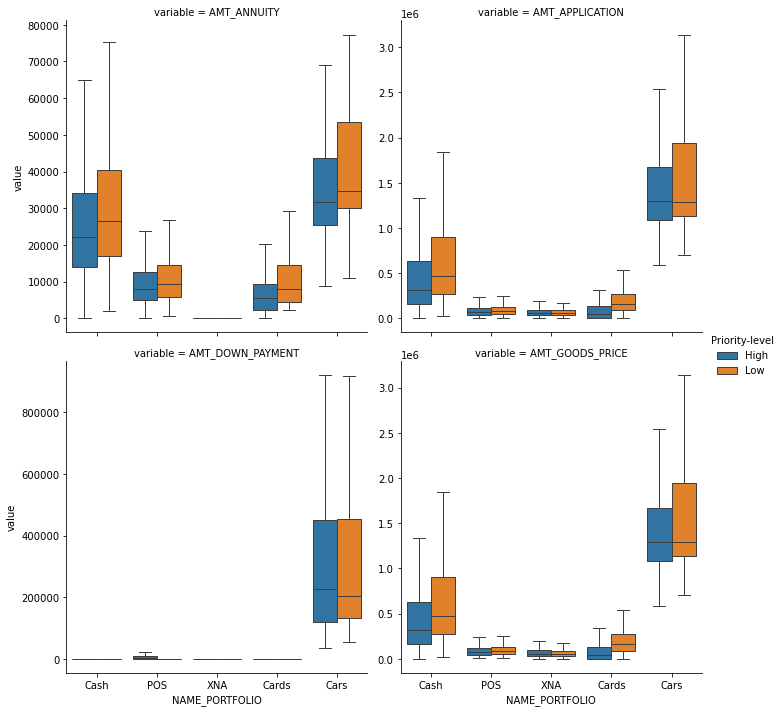

In [24]:
sns.catplot(
    data=melt_df, x='NAME_PORTFOLIO', y='value', hue='Priority-level',
    col='variable', kind='box', col_wrap=2, sharey=False, showfliers=False
)

### Relationship between numerical variables and priority level of loan application, categorized by `NAME_YIELD_GROUP`

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


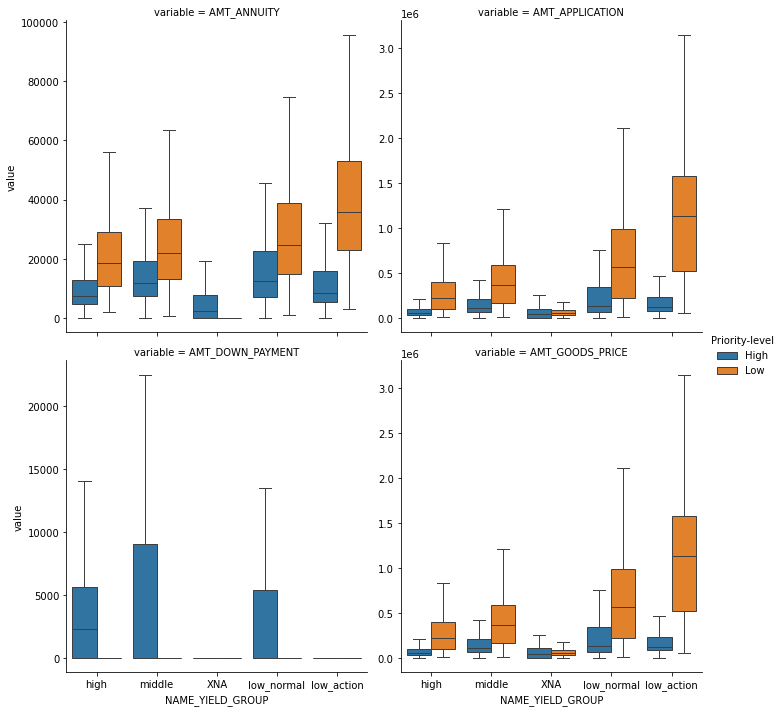

In [25]:
sns.catplot(
    data=melt_df, x='NAME_YIELD_GROUP', y='value', hue='Priority-level',
    col='variable', kind='box', col_wrap=2, sharey=False, showfliers=False
)

### Relationship between numerical variables and priority level of loan application, categorized by `PRODUCT_COMBINATION`

/home/oathaha/.conda/envs/env_oat/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


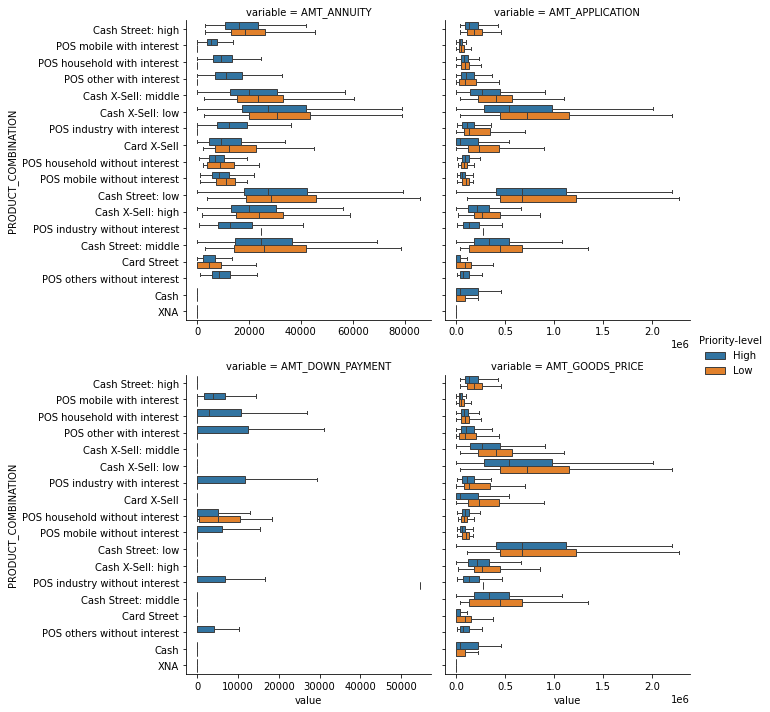

In [26]:
sns.catplot(
    data=melt_df, y='PRODUCT_COMBINATION', x='value', hue='Priority-level',
    col='variable', kind='box', col_wrap=2, sharex=False, showfliers=False, orient='y'
)